In [176]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import utils
import dataloaders
import torchvision
from trainer import Trainer
torch.random.manual_seed(0)
np.random.seed(0)


### Dataset

In [177]:
# Load the dataset and print some stats
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


In [178]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [179]:
# Test if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


### Hyperparameters & Loss function

In [180]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

### Train model

In [181]:
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict, test_loss_dict = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:08<00:00, 116.77it/s]


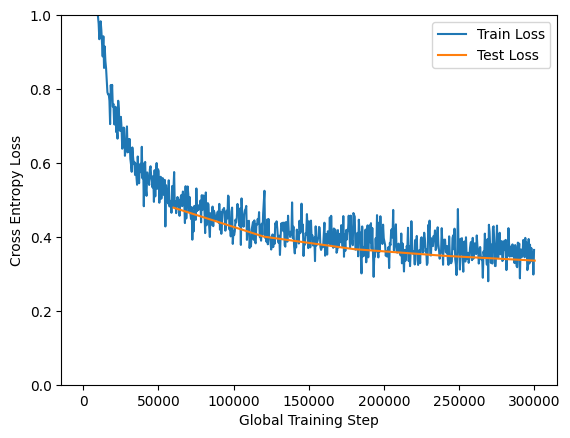

Final Test loss: 0.33583178710500905. Final Test accuracy: 0.9084


In [182]:
# We can now plot the training loss with our utility script

# Plot loss
utils.plot_loss(train_loss_dict, label="Train Loss")
utils.plot_loss(test_loss_dict, label="Test Loss")

# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

## Plotting example

In [183]:
# You can delete the remaining code of this notebook, as this is just to illustrate one method to solve the assignment tasks.


# This example code is here to illustrate how you can plot two different models to compare them.
# Lets change a small part of our model: the number of epochs trained (NOTE, use 5 epochs for your experiments in the assignment.)

# We reset the manual seed to 0, such that the model parameters are initialized with the same random number generator.
torch.random.manual_seed(0)
np.random.seed(0)


dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
model = create_model()

LEARNING_RATE = .0192
NUM_EPOCHS = 6

# Redefine optimizer, as we have a new model.
optimizer = torch.optim.SGD(model.parameters(),
                            lr=LEARNING_RATE)
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_6epochs, test_loss_dict_6epochs = trainer.train(NUM_EPOCHS)
NUM_EPOCHS = 5

Training epoch 5: 100%|██████████| 938/938 [00:07<00:00, 120.36it/s]


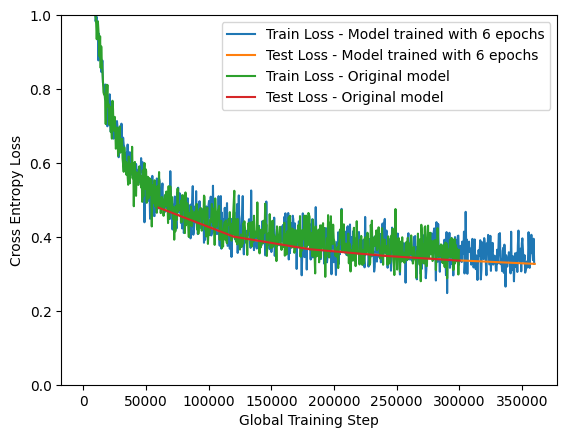

Final Test loss: 0.3269861391063329. Final Test accuracy: 0.9104


In [184]:
# We can now plot the two models against eachother

# Plot loss
utils.plot_loss(train_loss_dict_6epochs, label="Train Loss - Model trained with 6 epochs")
utils.plot_loss(test_loss_dict_6epochs, label="Test Loss - Model trained with 6 epochs")
utils.plot_loss(train_loss_dict, label="Train Loss - Original model")
utils.plot_loss(test_loss_dict, label="Test Loss - Original model")

# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")

final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
    
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task A

In [185]:
# Load the dataset
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: 0.0


In [186]:
def create_model():
    """
        Initializes the mode.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [187]:
# Testing if the model is able to do a single forward pass
example_images = utils.to_cuda(example_images)
output = model(example_images)
print("Output shape:", output.shape)
expected_shape = (batch_size, 10) # 10 since mnist has 10 different classes
assert output.shape == expected_shape,    f"Expected shape: {expected_shape}, but got: {output.shape}"

Output shape: torch.Size([64, 10])


In [188]:
# Hyperparameters
LEARNING_RATE = .0192
NUM_EPOCHS = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=LEARNING_RATE)

In [189]:
#Training model without normalization
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_not_norm, test_loss_dict_not_norm = trainer.train(NUM_EPOCHS)


Training epoch 4: 100%|██████████| 938/938 [00:07<00:00, 118.36it/s]


In [190]:
# Loading the dataset 
batch_size = 64

image_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(0.5, 0.5, inplace=True), #Normalizing the images to values between [-1, 1]
])

dataloader_train, dataloader_test = dataloaders.load_dataset(batch_size, image_transform)
example_images, _ = next(iter(dataloader_train))
print(f"The tensor containing the images has shape: {example_images.shape} (batch size, number of color channels, height, width)",
      f"The maximum value in the image is {example_images.max()}, minimum: {example_images.min()}", sep="\n\t")

The tensor containing the images has shape: torch.Size([64, 1, 28, 28]) (batch size, number of color channels, height, width)
	The maximum value in the image is 1.0, minimum: -1.0


In [191]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28*1, 10)
        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [192]:
# Hyperparameters
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)

In [193]:
# Training with normalization
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_norm, test_loss_dict_norm = trainer.train(num_epochs)

Training epoch 4: 100%|██████████| 938/938 [00:13<00:00, 70.27it/s]


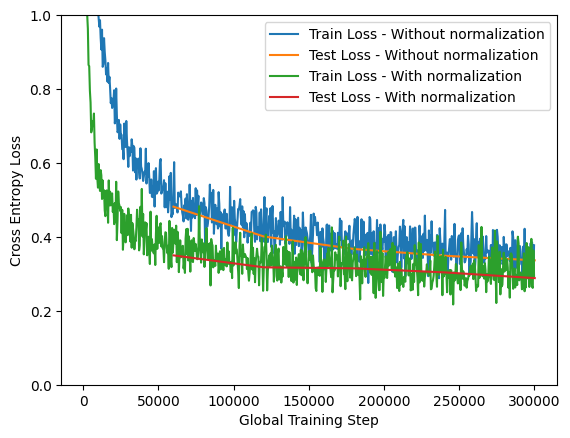

Final Test loss: 0.2884386709659912. Final Test accuracy: 0.9191


In [194]:
# We can now plot the two models (without and with normalization) against eachother

# Plot loss
utils.plot_loss(train_loss_dict_not_norm, label="Train Loss - Without normalization")
utils.plot_loss(test_loss_dict_not_norm, label="Test Loss - Without normalization")
utils.plot_loss(train_loss_dict_norm, label="Train Loss - With normalization")
utils.plot_loss(test_loss_dict_norm, label="Test Loss - With normalization")
# Limit the y-axis of the plot (The range should not be increased!)

plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

### Task B

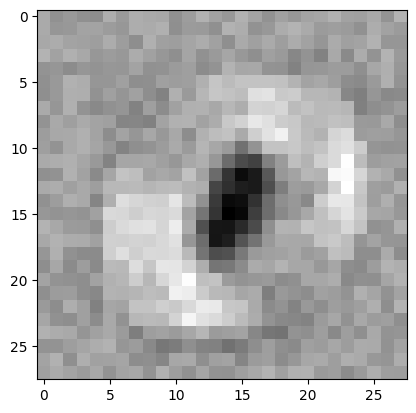

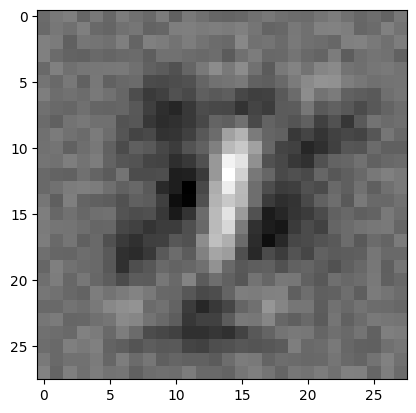

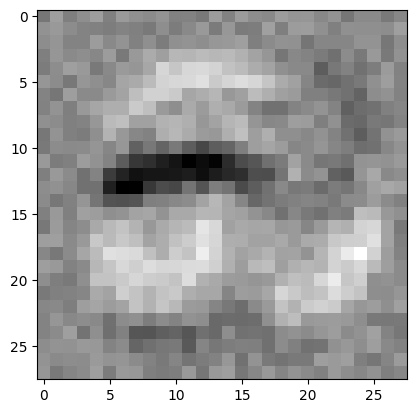

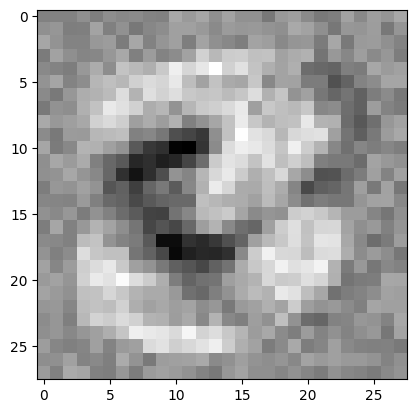

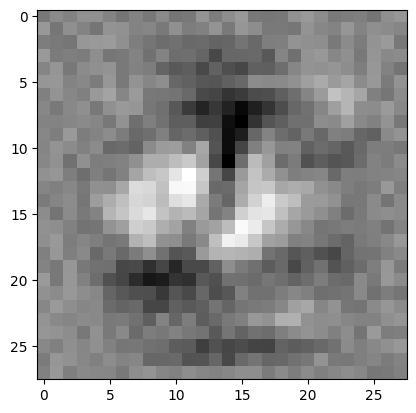

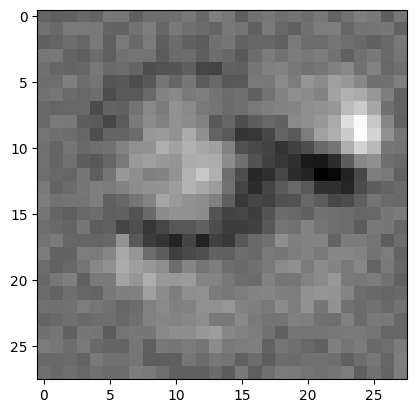

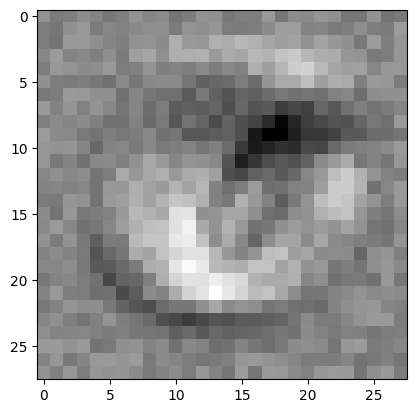

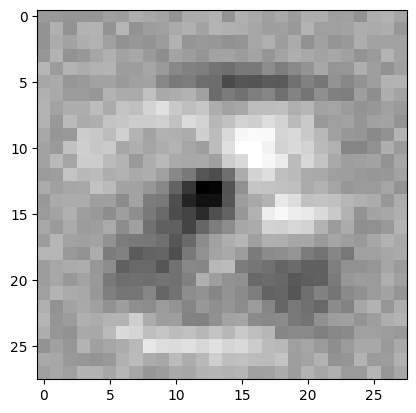

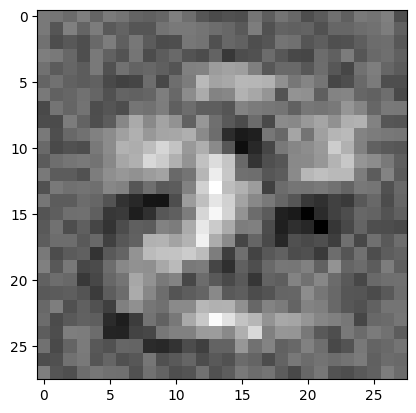

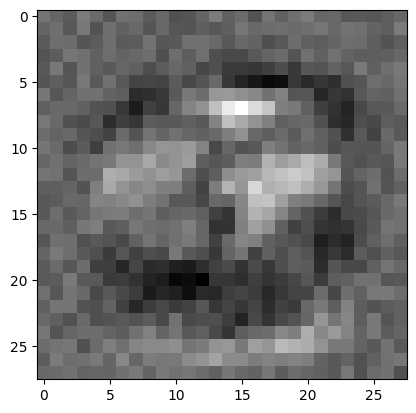

In [195]:
import numpy
weights = list(model.children())[1].weight.cpu().data.numpy() #Getting the weights from the fully connected layer

#Converts the weights for each digit to images
for weight in weights:
    converted = [[]]
    index = 0
    for i, val in enumerate(weight):

        if i % 28 == 0 and i != 0:
            converted.append([])
            index += 1
        
        converted[index].append(val)
    
    plt.imshow(converted, cmap='gray')
    plt.show()

### Task C

In [196]:
# Hyperparameters
LEARNING_RATE = 1.0 #New learning rate
NUM_EPOCHS = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=LEARNING_RATE)

In [197]:
# Training with 1.0 lr and normalization
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_new_lr, test_loss_dict_new_lr = trainer.train(NUM_EPOCHS)

Training epoch 4: 100%|██████████| 938/938 [00:12<00:00, 75.65it/s]


In [198]:
# We can now plot the two models (With original lr-value and 1 as lr-value) against eachother

# Plot loss
utils.plot_loss(train_loss_dict_norm, label="Train Loss - Withnormalization")
utils.plot_loss(test_loss_dict_norm, label="Test Loss - Withnormalization")
utils.plot_loss(train_loss_dict_new_lr, label="Train Loss - With 1.0 lr")
utils.plot_loss(test_loss_dict_new_lr, label="Test Loss - With 1.0 lr")

# Limit the y-axis of the plot (The range should not be increased!)
plt.ylim([0, 20])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")

final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
    
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")

Final Test loss: 2.2186448332562994. Final Test accuracy: 0.9022


### Task D

In [199]:
def create_model():
    """
        Initializes the mode. Edit the code below if you would like to change the model.
    """
    model = nn.Sequential(
        nn.Flatten(), # Flattens the image from shape (batch_size, C, Height, width) to (batch_size, C*height*width)
        nn.Linear(28*28, 64), # Added hidden layer with 64 nodes
        nn.ReLU(),
        nn.Linear(64, 10),

        # No need to include softmax, as this is already combined in the loss function
    )
    # Transfer model to GPU memory if a GPU is available
    model = utils.to_cuda(model)
    return model


model = create_model()

In [200]:
# Hyperparameters
LEARNING_RATE = 0.0192
NUM_EPOCHS = 5

# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=LEARNING_RATE)

In [201]:
# Training with the added layer
trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_test=dataloader_test,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_dict_added_layer, test_loss_dict_added_layer = trainer.train(NUM_EPOCHS)

Training epoch 4: 100%|██████████| 938/938 [00:12<00:00, 75.12it/s]


In [202]:
# We can now plot the two models (with and without the added layer) against eachother 

# Plot loss
utils.plot_loss(train_loss_dict_norm, label="Train Loss - With normalization")
utils.plot_loss(test_loss_dict_norm, label="Test Loss - With normalization")
utils.plot_loss(train_loss_dict_added_layer, label="Train Loss - With added layer")
utils.plot_loss(test_loss_dict_added_layer, label="Test Loss - With added layer")

# Limit the y-axis of the plot
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Global Training Step")
plt.ylabel("Cross Entropy Loss")
plt.savefig("image_solutions/task_4a.png")

plt.show()

torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_test, model, loss_function)
print(f"Final Test loss: {final_loss}. Final Test accuracy: {final_acc}")


Final Test loss: 0.20366991021237366. Final Test accuracy: 0.9387
